In [13]:
import sqlite3
import csv
import pandas as pd
import numpy as np

# EXERCISE 1

In [2]:
csv_path = 'lab_data/SE4ALLData.csv'

In [81]:
conn = sqlite3.connect("SE4ALL.db")
c = conn.cursor()
c.execute('''CREATE TABLE energy (CountryName TEXT
NOCASE, IndicatorCode TEXT NOCASE, Year INTEGER,
Value REAL)''')
conn.commit()

In [82]:
def float_or_none(var):
    return var if var!="" else None

In [83]:
with open(csv_path, 'r', encoding='UTF-8') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='"')
    headers = next(reader)
    headerid = {}
    for i,h in enumerate(headers):
        headerid[h] = i

    for row in reader: 
        for year in range(1990,2017):
            c.execute("INSERT INTO energy VALUES (:CountryName, :IndicatorCode, :Year, :Value)", {
            'CountryName': row[0],
            'IndicatorCode': row[3],
            'Year': year,
            'Value': float_or_none(row[headerid[str(year)]]
            )
        })
    
conn.commit()

# QUESTION 2

Write a SQL query to find the countries with the highest renewable electricity share of total electricity output in 2015.
Do these numbers seem reliable?

In [16]:
con = sqlite3.connect('SE4ALL.db')
cur = con.cursor()


In [17]:
query = "SELECT COUNTRYNAME, VALUE FROM ENERGY where YEAR = 2015 AND Value IS NOT NULL AND INDICATORCODE = '1.1_TOTAL.FINAL.ENERGY.CONSUM' "

In [18]:
data = {}
for row in cur.execute(query):
    try:
        data[row[0]] += row[1]
    except:
        data[row[0]] = row[1]

In [19]:
s = pd.Series(data)
n = s.argmax()
s.index[n]

'China'

# QUESTION 3

Plot a time series of the indicator 4.1_SHARE.RE.IN.ELECTRICITY
for a number of countries of your choice

In [5]:
con = sqlite3.connect('SE4ALL.db')
cur = con.cursor()

In [25]:
df = pd.DataFrame(index=np.arange(1990,2017), columns=data.keys())
df.head()

,BES Islands,Nauru,Niue,Wallis and Futuna,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,Western Sahara,"Yemen, Rep.",Zambia,Zimbabwe
1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df['Nauru'][1990]

nan

In [28]:
query = "SELECT COUNTRYNAME, YEAR, VALUE FROM ENERGY WHERE INDICATORCODE = '4.1_SHARE.RE.IN.ELECTRICITY' AND VALUE IS NOT NULL"
for row in cur.execute(query):
    df[row[0]][row[1]] = row[2]

In [29]:
df.head()

,BES Islands,Nauru,Niue,Wallis and Futuna,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,Western Sahara,"Yemen, Rep.",Zambia,Zimbabwe
1990,NaN,0,0,0,67.7305,86.4078,0.838301,0,100,86.2069,...,11.8029,0,62.3439,61.8477,0,0,0,0,99.2263,46.6674
1991,NaN,0,0,0,67.9803,92.1425,1.68925,0,100,82.6552,...,11.1345,0,70.3254,68.5885,0,0,0,0,99.2815,35.3205
1992,NaN,0,0,0,67.9943,95.0501,1.08826,0,100,88.7012,...,12.3372,0,70.0934,74.4771,0,0,0,0,99.0725,38.3756
1993,NaN,0,0,0,68.3453,93.9076,1.81828,0,100,93.6842,...,14.9708,0,68.4299,74.7046,0,0,0,0,99.2925,27.6111
1994,NaN,0,0,0,68.7045,95.6864,0.834884,0,100,93.7173,...,14.9707,0,72.0069,75.2197,0,0,0,0,99.398,27.8036


<AxesSubplot:>

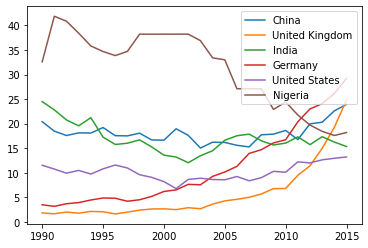

In [36]:
df[['China', 'United Kingdom', 'India', 'Germany', 'United States', 'Nigeria']].plot()

# EXERCISE 4

What happens in the code above when bigfile.csv
is one terabyte? How can we accomplish the same thing using O(1)
memory? We stream it otherwise we are risking a crash

# EXERCISE 5 AND 6
